In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
!tar -xvf spark-3.0.3-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"
import findspark
findspark.init()

spark-3.0.3-bin-hadoop2.7/
spark-3.0.3-bin-hadoop2.7/NOTICE
spark-3.0.3-bin-hadoop2.7/kubernetes/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/Dockerfile
spark-3.0.3-bin-hadoop2.7/jars/
spark-3.0.3-bin-hadoop2.7/jars/jacks

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [3]:
dataset = spark.read.option("inferSchema", "true").csv("Dataset/Clustering/Clustering.csv", header = True)

In [4]:
dataset = dataset.select("sugar_level", "fat")

In [5]:
dataset = dataset.na.drop()

In [6]:
from pyspark.sql.functions import when, translate
from pyspark.sql.types import FloatType, IntegerType

dataset = dataset.withColumn('sugar_level', translate(dataset['sugar_level'], ' gr', '').cast(FloatType()))
dataset = dataset.withColumn('fat', translate(dataset['fat'], ' gr', '').cast(IntegerType()))
# dataset = dataset.withColumn('calories', translate(dataset['calories'], ' cal', '').cast(IntegerType()))
# dataset = dataset.withColumn('weight', translate(dataset['weight'], ' gr', '').cast(FloatType()))

In [7]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

cols = dataset.columns
dataset = VectorAssembler(inputCols=cols, outputCol="Vector").transform(dataset)

scaler = StandardScaler(inputCol="Vector", outputCol="features")
dataset = scaler.fit(dataset).transform(dataset)

In [8]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans().setK(2)
model = kmeans.fit(dataset)
predictions = model.transform(dataset)

predictions = model.transform(dataset)

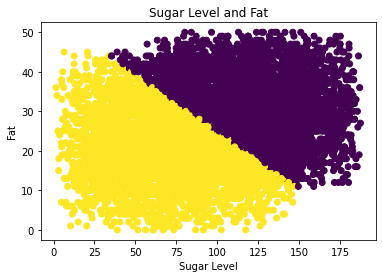

In [9]:
import matplotlib.pyplot as plt

predictions = predictions.toPandas()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(predictions["sugar_level"], predictions["fat"], c=predictions["prediction"])
ax.set_title('Sugar Level and Fat')
ax.set_xlabel('Sugar Level')
ax.set_ylabel('Fat')
plt.show()